# Get Bushing Angle

1.   Get image
2.  Convert image to matrix
3.  Create submatrix over keyhole
4.  Apply binary filter to keyhole to minimize noise
5.  Determine angle from keyhole orientation
      - find center of centroid
      - find center of keyway edge
      - find angle between the two






**Notes:**

Positive space - 1

Negative space - 0

WIP space - 2


a - raw bushing image array (grayscale)

b - cropped keyhole array (grayscale)

c - binary array

d - keyhole array

e - keyhole minus keyslot array

In [ ]:
#import libraries
import matplotlib.image as img
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from numpy import asarray
import sys
import cv2
import math
from scipy import ndimage

#show everything
np.set_printoptions(threshold=sys.maxsize)

Raw image, array a: 


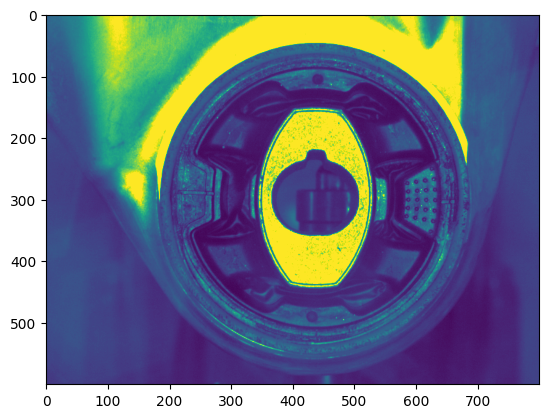

In [ ]:
#convert image to numpy array
# img = Image.open('/content/IM_Bushing.bmp')
img = Image.open('/content/IMBushing_90_999ang.bmp')
data = asarray(img)

#convert image to grayscale
print('Raw image, array a: ')
imshow(np.asarray(data))

**Disgusting manual pixel cleanup**

Raw image, array b: 


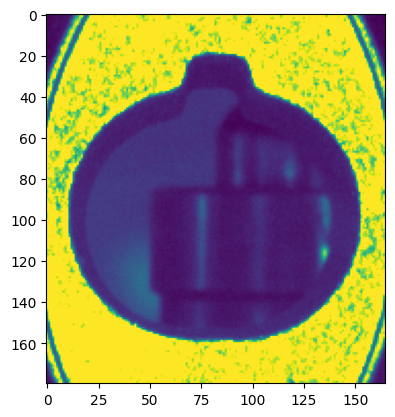

In [ ]:
#matrix slicing
a = data.copy()
b = a[200: 380, 355:520]

b1 = b.copy()
c = b.copy()

print('Raw image, array b: ')
imshow(np.asarray(b))

#apply median filter for better edge detection
filterintensity = 9
c = cv2.medianBlur(c, filterintensity)

#manually cut out corners and replace with white pixel
maxnumX = len(c)
maxnumY = len(c[0])

#top
for i in range(15): #max rows = 180, Y axis
  for j in range(maxnumY): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

#top left
for i in range(30): #max rows = 180, Y axis
  for j in range(60): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255
for i in range(60): #max rows = 180, Y axis
  for j in range(20): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

#top right
for i in range(30): #max rows = 180, Y axis
  for j in range(105, 165): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255
for i in range(65): #max rows = 180, Y axis
  for j in range(145, 165): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

#Bottom
for i in range(160, maxnumX): #max rows = 180, Y axis
  for j in range(maxnumY): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

#Bottom left
for i in range(140, maxnumX): #max rows = 180, Y axis
  for j in range(20): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

#Bottom right
for i in range(125, maxnumX): #max rows = 180, Y axis
  for j in range(150, maxnumY): #max columns = 165, X axis
    if c[i][j] < 255:
      c[i][j] = 255

Cleaned up image, array c: 


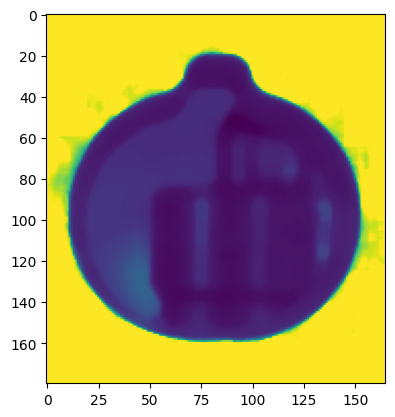

In [ ]:
print('Cleaned up image, array c: ')
imshow(np.asarray(c))

In [ ]:
# show all matrix entries
# print(c)

Cleaned up image, array c: 


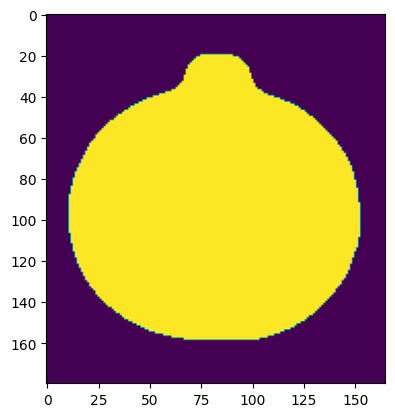

In [ ]:
#convert grayscale matrix to binary matrix
for k in range(maxnumX): #max rows = 180, Y axis
  for l in range(maxnumY): #max columns = 165, X axis
    if c[k][l] < 120:
      c[k][l] = 1
    if c[k][l] >= 120:
      c[k][l] = 0

print('Cleaned up image, array c: ')
imshow(np.asarray(c))

Center of centroid: 
[95, 82]


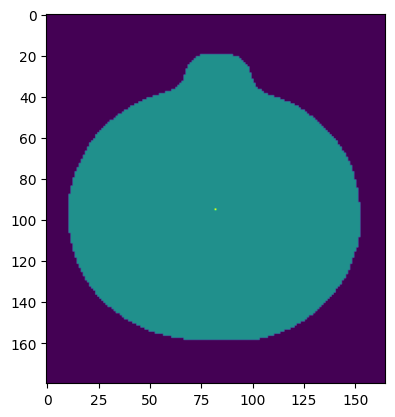

In [ ]:
#get center of centroid
c1 = c.copy()

com = ndimage.center_of_mass(c)
comint = tuple(map(round, com))
comlist = [*comint,]

print('Center of centroid: ')
print(comlist)

c[comlist[0]][comlist[1]] = 2

#convert list data type to ints
tempX = [comlist[0]]
tempY = [comlist[1]]

cenX = 0
for current_digit in tempX:
  cenX = cenX*10 + current_digit

cenY = 0
for current_digit in tempY:
  cenY = cenY*10 + current_digit

imshow(np.asarray(c))

**Isolate keyway and body**

**First get keyway**

radius: 
63


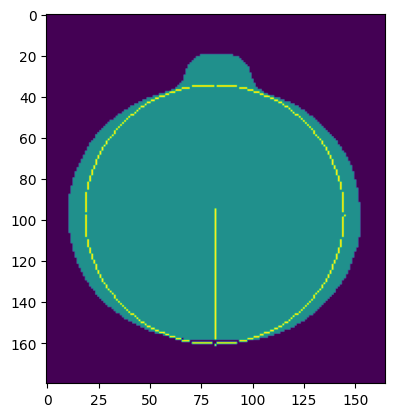

In [ ]:
d = c.copy()

#find r
#iterate through the centerY column to get radius Y
memoryflag = 0
r = 0
for m in range(maxnumX):
  if memoryflag == 1:
    if d[m][cenY] == 1:
     d[m][cenY] = 2
     r += 1
  if d[m][cenY] == 2:
    memoryflag = 1

print('radius: ')
print(r)

# add correction factor to get more keyway
correctionX = 3

# draw a circle from center point to guide line in coloring
for angle in range(0, 360):
    x = r * math.sin(math.radians(angle)) + cenX + correctionX
    y = r * math.cos(math.radians(angle)) + cenY
    d[int(x)][int(y)] = 2

imshow(np.asarray(d))

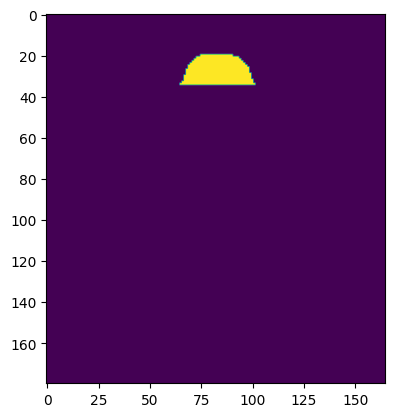

In [ ]:
# draw radius line upwards
memflag = 0
for m in range(maxnumX): #iterate through X axis
  for n in range(maxnumY):
    if memflag == 1:
      # color every cel below first 2 detect negative
      d[m][n] = 0

    if d[m][n] == 2 and memflag != 1:
      memflag = 1

      # color the currnet row negative as well
      for o in range(maxnumY):
        d[m][o] = 0

# Keyhole Obtained!
imshow(np.asarray(d))

Center of centroid: 
[28, 83]


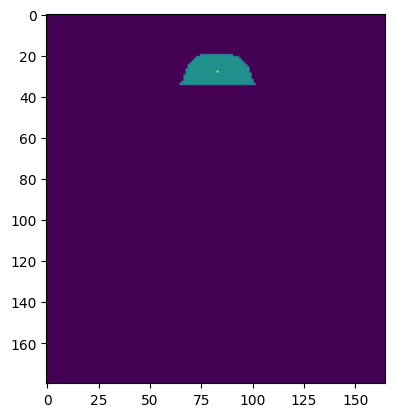

In [ ]:
# find center of keyway
#get center of centroid
com = ndimage.center_of_mass(d)
comint = tuple(map(round, com))
comlist = [*comint,]

print('Center of centroid: ')
print(comlist)

d[comlist[0]][comlist[1]] = 2

#convert list data type to ints
tempX = [comlist[0]]
tempY = [comlist[1]]

keycenX = 0
for current_digit in tempX:
  keycenX = keycenX*10 + current_digit

keycenY = 0
for current_digit in tempY:
  keycenY = keycenY*10 + current_digit

imshow(np.asarray(d))

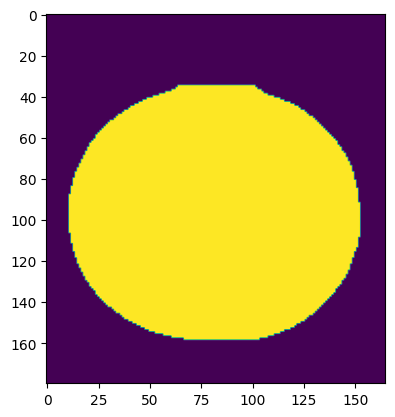

In [ ]:
#subtract d from b to get center of mass of the hole
e = c1 + d

for m in range(maxnumX):
  for n in range(maxnumY):
    if e[m][n] != 1:
      e[m][n] = 0

imshow(np.asarray(e))

Center of centroid: 
[97, 82]


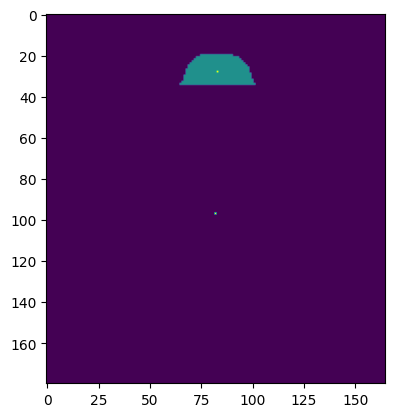

In [ ]:
# find center of hole
#get center of centroid
com = ndimage.center_of_mass(e)
comint = tuple(map(round, com))
comlist = [*comint,]

print('Center of centroid: ')
print(comlist)

d[comlist[0]][comlist[1]] = 2

#convert list data type to ints
tempX = [comlist[0]]
tempY = [comlist[1]]

holecenX = 0
for current_digit in tempX:
  holecenX = holecenX*10 + current_digit

holecenY = 0
for current_digit in tempY:
  holecenY = holecenY*10 + current_digit

imshow(np.asarray(d))

In [ ]:
# get the angle!
rad = math.atan2(holecenY-keycenY, holecenX-keycenX)
deg = math.degrees(rad)

corrfactor = 1.8

finalangle = deg + 90 + corrfactor

print(round(finalangle, 3))

90.97
